# Life Expectancy prediction

### The business problem of life expectancy prediction revolves around estimating the probable lifespan or survival time of individuals of peoples of different countries based on various factors such as Status, Alchohol consumption, smoking, health diseases like AIDS/ HIV, Measles, etc

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import math

import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from dython.nominal import associations
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
df.shape

(2938, 22)

In [4]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df.rename(columns = {'Life expectancy': 'Life_expectancy', 'Adult Mortality': 'Adult_Mortality'}, inplace = True)

In [7]:
df.rename(columns = {'infant deaths': 'infant_deaths', 'percentage expenditure': 'percentage_expenditure', ' BMI ': 'BMI'}, inplace = True)

In [8]:
df.rename(columns = {'Hepatitis B': 'Hepatitis_B', 'under-five deaths ': 'under_five_deaths'}, inplace = True)

In [9]:
df.rename(columns = {'Total expenditure': 'Total_expenditure', ' HIV/AIDS': 'HIV_AIDS', ' thinness  1-19 years': 'thinness_1_19_years', ' thinness 5-9 years': 'thinness_5_9_years', 'Income composite of resources': 'Income_composite_of_resources', 'Income composition of resources': 'Income_composition_of_resources'}, inplace = True)

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles ', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria ', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [11]:
df.rename(columns = {'Life expectancy ': 'Life_expectancy', 'Diphtheria ': 'Diphtheria'}, inplace = True)

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles ', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [13]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [14]:
print(df['Life_expectancy'].isnull().sum()/ len(df) * 100)
print(df['Adult_Mortality'].isnull().sum()/ len(df) * 100)
print(df['Alcohol'].isnull().sum()/ len(df) * 100)
print(df['Hepatitis_B'].isnull().sum()/ len(df) * 100)
print(df['BMI'].isnull().sum()/ len(df) * 100)
print(df['Polio'].isnull().sum()/ len(df) * 100)
print(df['Total_expenditure'].isnull().sum()/ len(df) * 100)
print(df['Diphtheria'].isnull().sum()/ len(df) * 100)
print(df['GDP'].isnull().sum()/ len(df) * 100)
print(df['Population'].isnull().sum()/ len(df) * 100)
print(df['thinness_1_19_years'].isnull().sum()/ len(df) * 100)
print(df['thinness_5_9_years'].isnull().sum()/ len(df) * 100)
print(df['Income_composition_of_resources'].isnull().sum()/ len(df) * 100)
print(df['Schooling'].isnull().sum()/ len(df) * 100)

0.3403675970047651
0.3403675970047651
6.603131381892443
18.82232811436351
1.1572498298162015
0.6466984343090538
7.6923076923076925
0.6466984343090538
15.248468345813478
22.19196732471069
1.1572498298162015
1.1572498298162015
5.684138869979578
5.547991831177672


In [15]:
df.dropna(subset = ['Life_expectancy'], inplace = True)

In [16]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            193
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 32
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                443
Population                         644
thinness_1_19_years                 32
thinness_5_9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [17]:
print(df['Alcohol'].isnull().sum()/ len(df) * 100)
print(df['Hepatitis_B'].isnull().sum()/ len(df) * 100)
print(df['BMI'].isnull().sum()/ len(df) * 100)
print(df['Polio'].isnull().sum()/ len(df) * 100)
print(df['Total_expenditure'].isnull().sum()/ len(df) * 100)
print(df['Diphtheria'].isnull().sum()/ len(df) * 100)
print(df['GDP'].isnull().sum()/ len(df) * 100)
print(df['Population'].isnull().sum()/ len(df) * 100)
print(df['thinness_1_19_years'].isnull().sum()/ len(df) * 100)
print(df['thinness_5_9_years'].isnull().sum()/ len(df) * 100)
print(df['Income_composition_of_resources'].isnull().sum()/ len(df) * 100)
print(df['Schooling'].isnull().sum()/ len(df) * 100)

6.591530054644809
18.886612021857925
1.092896174863388
0.6489071038251366
7.718579234972678
0.6489071038251366
15.129781420765026
21.994535519125684
1.092896174863388
1.092896174863388
5.46448087431694
5.46448087431694


In [18]:
df.dropna(subset = ['BMI'], inplace = True)

In [19]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            176
percentage_expenditure               0
Hepatitis_B                        533
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                8
Total_expenditure                  212
Diphtheria                           8
HIV_AIDS                             0
GDP                                435
Population                         644
thinness_1_19_years                  0
thinness_5_9_years                   0
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [20]:
print(df['Alcohol'].isnull().sum()/ len(df) * 100)
print(df['Hepatitis_B'].isnull().sum()/ len(df) * 100)
print(df['Polio'].isnull().sum()/ len(df) * 100)
print(df['Total_expenditure'].isnull().sum()/ len(df) * 100)
print(df['Diphtheria'].isnull().sum()/ len(df) * 100)
print(df['GDP'].isnull().sum()/ len(df) * 100)
print(df['Population'].isnull().sum()/ len(df) * 100)
print(df['Income_composition_of_resources'].isnull().sum()/ len(df) * 100)
print(df['Schooling'].isnull().sum()/ len(df) * 100)

6.077348066298343
18.404696132596683
0.2762430939226519
7.320441988950275
0.2762430939226519
15.0207182320442
22.23756906077348
5.524861878453039
5.524861878453039


In [21]:
df.dropna(subset = ['Polio'], inplace = True)

In [22]:
print(df['Alcohol'].isnull().sum()/ len(df) * 100)
print(df['Hepatitis_B'].isnull().sum()/ len(df) * 100)
print(df['Total_expenditure'].isnull().sum()/ len(df) * 100)
print(df['GDP'].isnull().sum()/ len(df) * 100)
print(df['Population'].isnull().sum()/ len(df) * 100)
print(df['Income_composition_of_resources'].isnull().sum()/ len(df) * 100)
print(df['Schooling'].isnull().sum()/ len(df) * 100)

6.059556786703601
18.178670360110804
7.340720221606649
15.062326869806094
22.299168975069254
5.540166204986149
5.540166204986149


In [23]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            175
percentage_expenditure               0
Hepatitis_B                        525
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                  212
Diphtheria                           0
HIV_AIDS                             0
GDP                                435
Population                         644
thinness_1_19_years                  0
thinness_5_9_years                   0
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [24]:
df.shape

(2888, 22)

In [25]:
df['Alcohol'].head(10)

0    0.01
1    0.01
2    0.01
3    0.01
4    0.01
5    0.01
6    0.01
7    0.03
8    0.02
9    0.03
Name: Alcohol, dtype: float64

In [26]:
px.box(df, y = 'Alcohol')

In [27]:
Alchohol_mean = df['Alcohol'].mean()
Alchohol_mean

4.64382970880946

In [28]:
df['Alcohol'] = df['Alcohol'].replace(np.nan, Alchohol_mean)

In [29]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                        525
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                  212
Diphtheria                           0
HIV_AIDS                             0
GDP                                435
Population                         644
thinness_1_19_years                  0
thinness_5_9_years                   0
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [30]:
df['Hepatitis_B'].isnull().sum()/ len(df) * 100

18.178670360110804

In [31]:
df['Hepatitis_B'].dtype

dtype('float64')

In [32]:
px.box(df, y = 'Hepatitis_B')

In [33]:
Hepatitis_B_median = df['Hepatitis_B'].median()
Hepatitis_B_median

92.0

In [34]:
df['Hepatitis_B'] = df['Hepatitis_B'].replace(np.nan, Hepatitis_B_median)

In [35]:
px.box(df, y = 'Hepatitis_B')

In [36]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                  212
Diphtheria                           0
HIV_AIDS                             0
GDP                                435
Population                         644
thinness_1_19_years                  0
thinness_5_9_years                   0
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [37]:
df['Total_expenditure'].head(10)

0    8.16
1    8.18
2    8.13
3    8.52
4    7.87
5    9.20
6    9.42
7    8.33
8    6.73
9    7.43
Name: Total_expenditure, dtype: float64

In [38]:
px.box(df, y = 'Total_expenditure')

In [39]:
Total_expenditure_median = df['Total_expenditure'].median()
df['Total_expenditure'] = df['Total_expenditure'].replace(np.nan, Total_expenditure_median)

In [40]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                    0
Diphtheria                           0
HIV_AIDS                             0
GDP                                435
Population                         644
thinness_1_19_years                  0
thinness_5_9_years                   0
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [41]:
df['GDP'].head(10)

0    584.259210
1    612.696514
2    631.744976
3    669.959000
4     63.537231
5    553.328940
6    445.893298
7    373.361116
8    369.835796
9    272.563770
Name: GDP, dtype: float64

In [42]:
px.box(df, y = 'GDP')

In [43]:
GDP_median = df['GDP'].median()
GDP_median

1812.288374

In [44]:
df['GDP'] = df['GDP'].replace(np.nan, GDP_median)

In [45]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                    0
Diphtheria                           0
HIV_AIDS                             0
GDP                                  0
Population                         644
thinness_1_19_years                  0
thinness_5_9_years                   0
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [46]:
px.box(df, y = 'Population')

In [47]:
Population_median = df['Population'].median()
Population_median

1383743.0

In [48]:
df['Population'] = df['Population'].replace(np.nan, Population_median)

In [49]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                    0
Diphtheria                           0
HIV_AIDS                             0
GDP                                  0
Population                           0
thinness_1_19_years                  0
thinness_5_9_years                   0
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [50]:
px.box(df, y = 'Income_composition_of_resources')

In [51]:
Income_composition_of_resources_mean = df['Income_composition_of_resources'].mean()
Income_composition_of_resources_mean

0.6325425219941332

In [52]:
df['Income_composition_of_resources'] = df['Income_composition_of_resources'].replace(np.nan, Income_composition_of_resources_mean)

In [53]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                    0
Diphtheria                           0
HIV_AIDS                             0
GDP                                  0
Population                           0
thinness_1_19_years                  0
thinness_5_9_years                   0
Income_composition_of_resources      0
Schooling                          160
dtype: int64

In [54]:
px.box(df, y = 'Schooling')

In [55]:
Schooling_median = df['Schooling'].median()
Schooling_median

12.4

In [56]:
df['Schooling'] = df['Schooling'].replace(np.nan, Schooling_median)

In [57]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

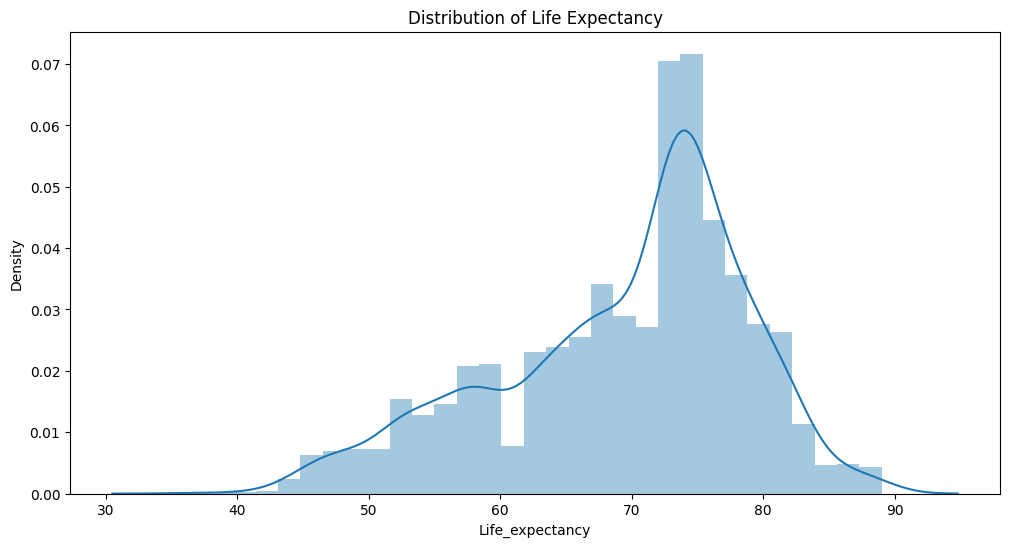

In [58]:
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Life Expectancy')
sns.distplot(df['Life_expectancy'])
plt.show()

In [59]:
df['Life_expectancy'].skew()

-0.6631620658294144

In [60]:
df['Life_expectancy'] = stats.boxcox(df['Life_expectancy'])[0]

In [61]:
df['Life_expectancy'].skew()

-0.10629096423567624

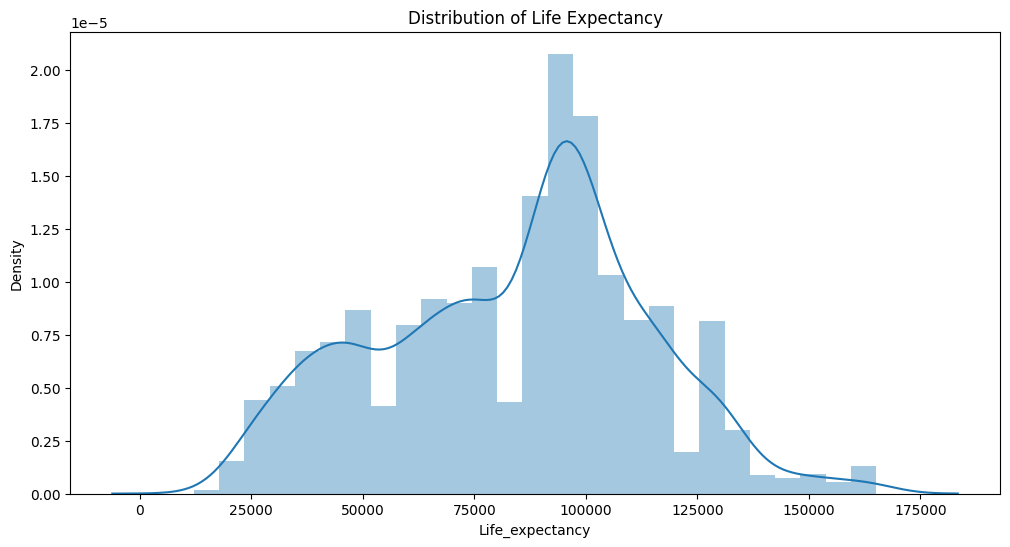

In [62]:
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Life Expectancy')
sns.distplot(df['Life_expectancy'])
plt.show()

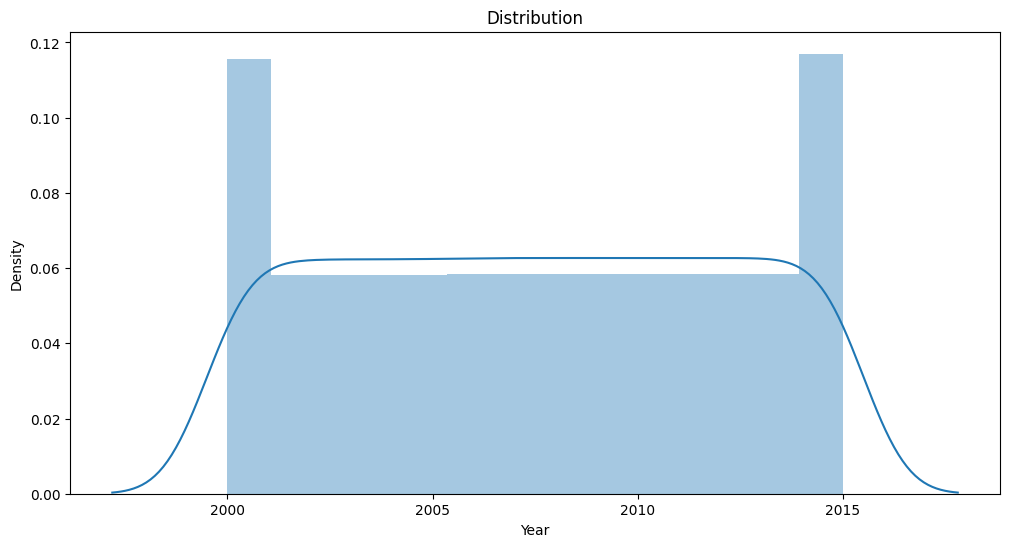

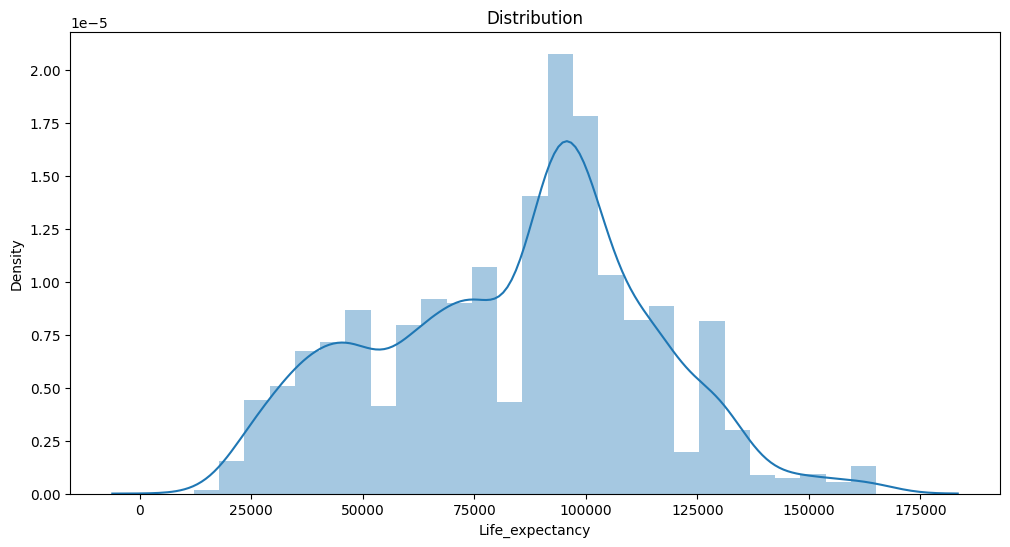

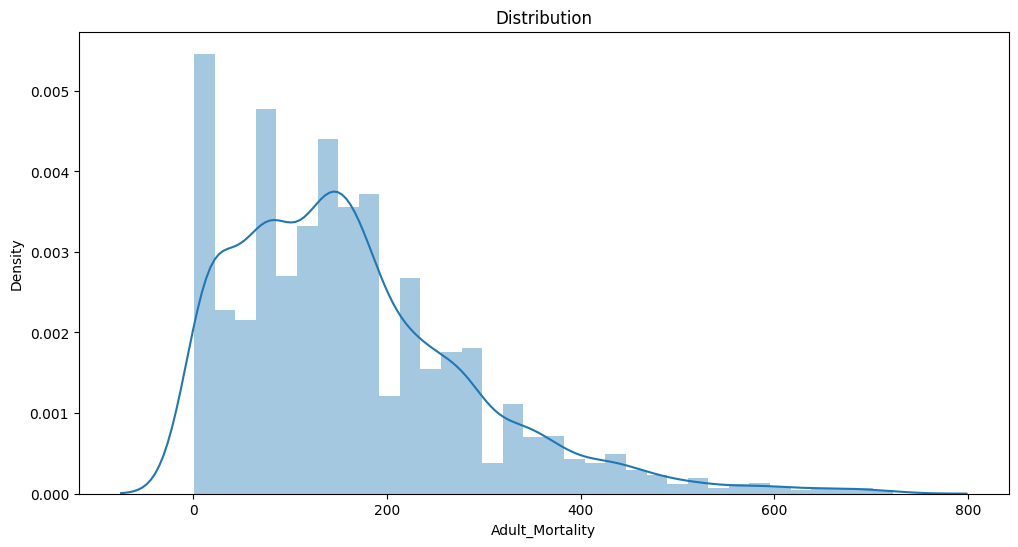

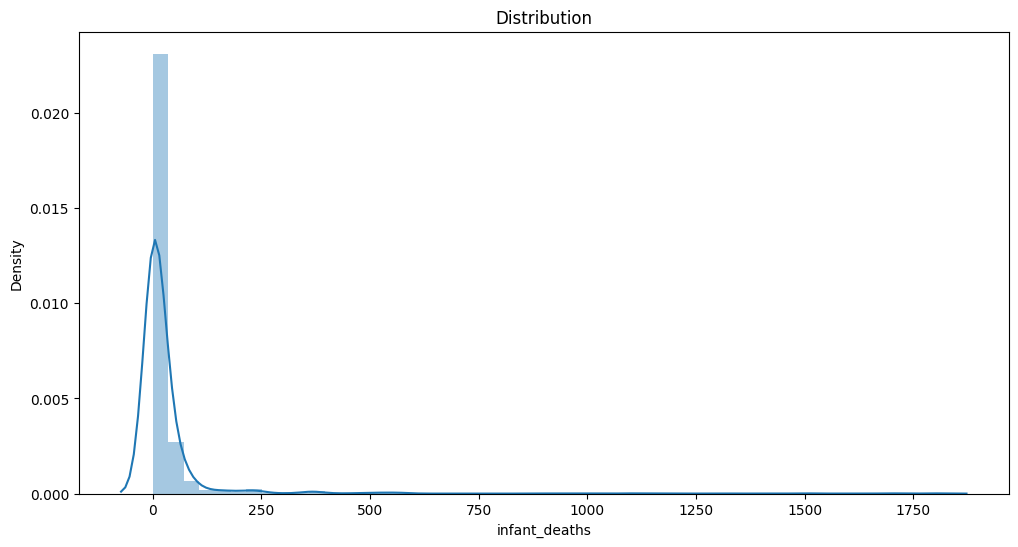

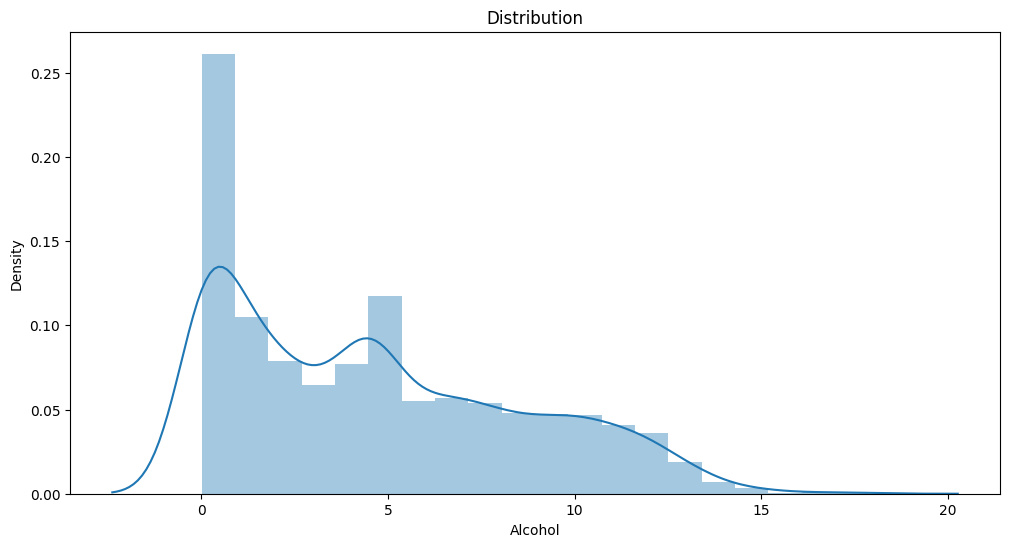

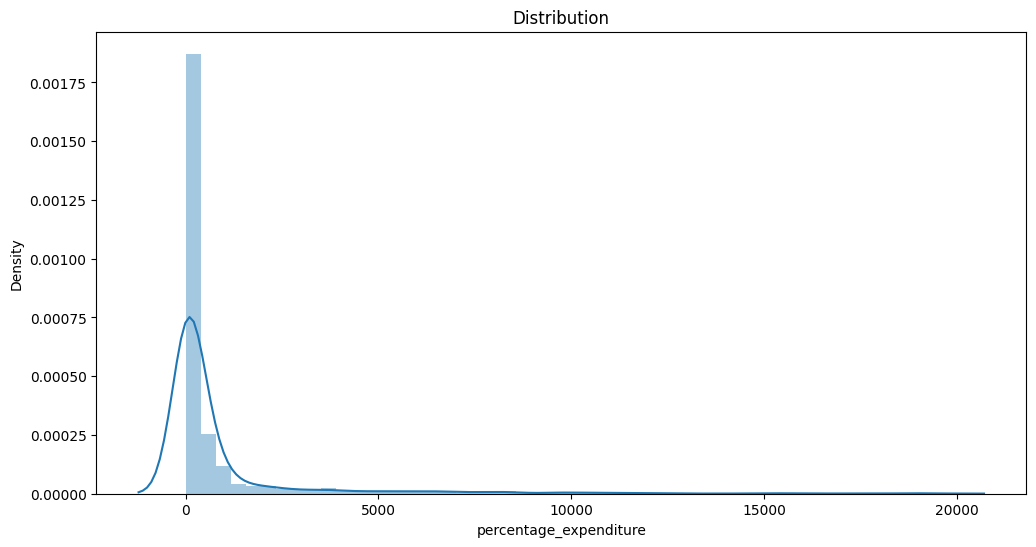

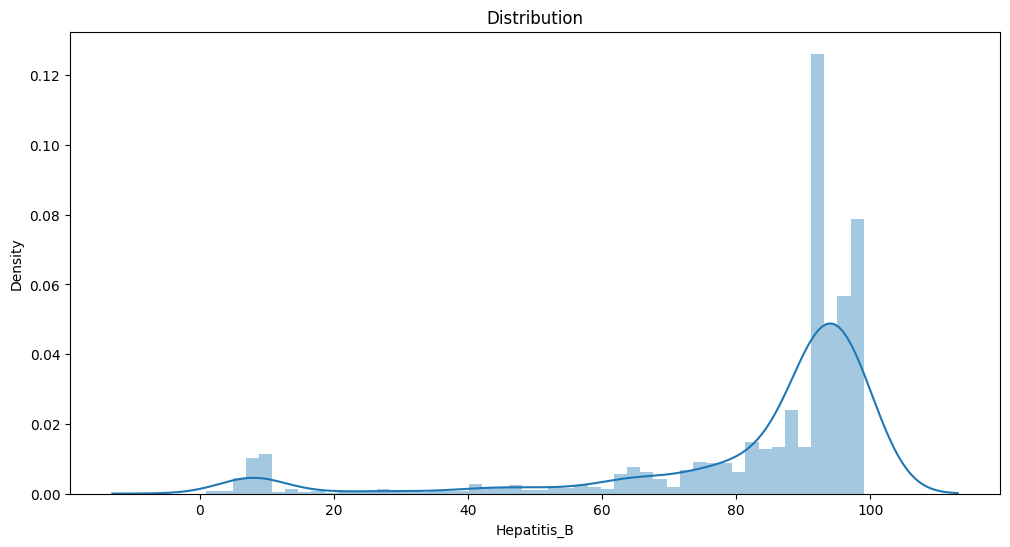

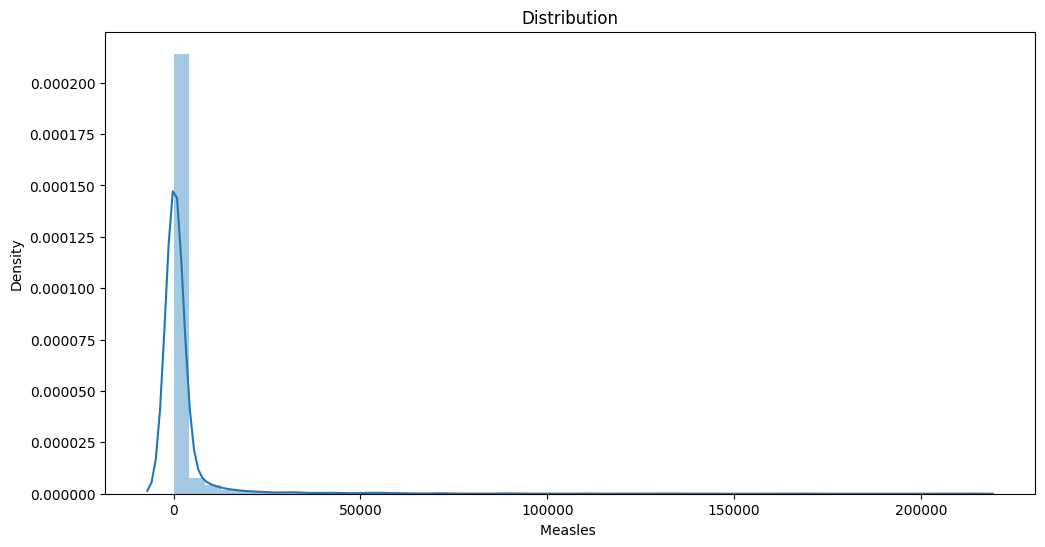

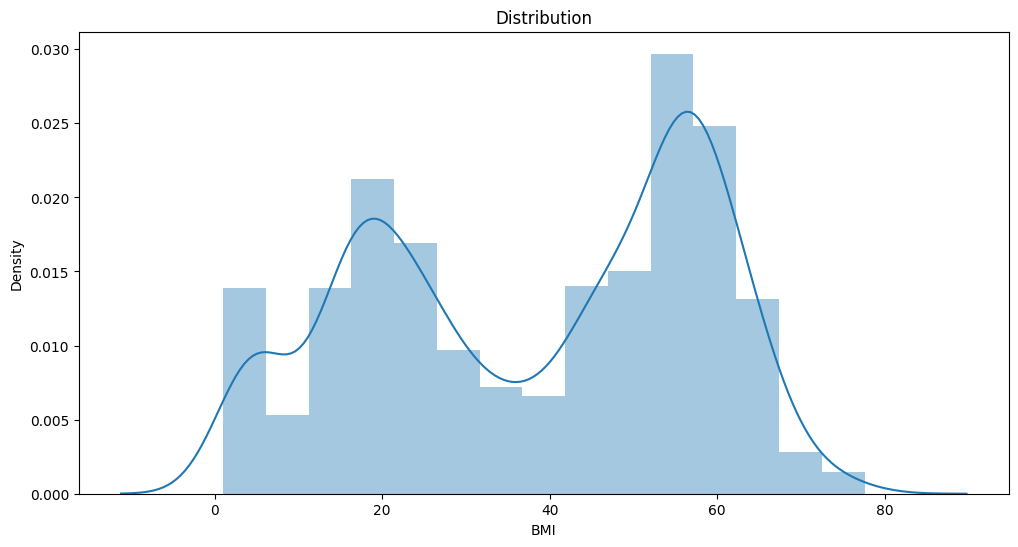

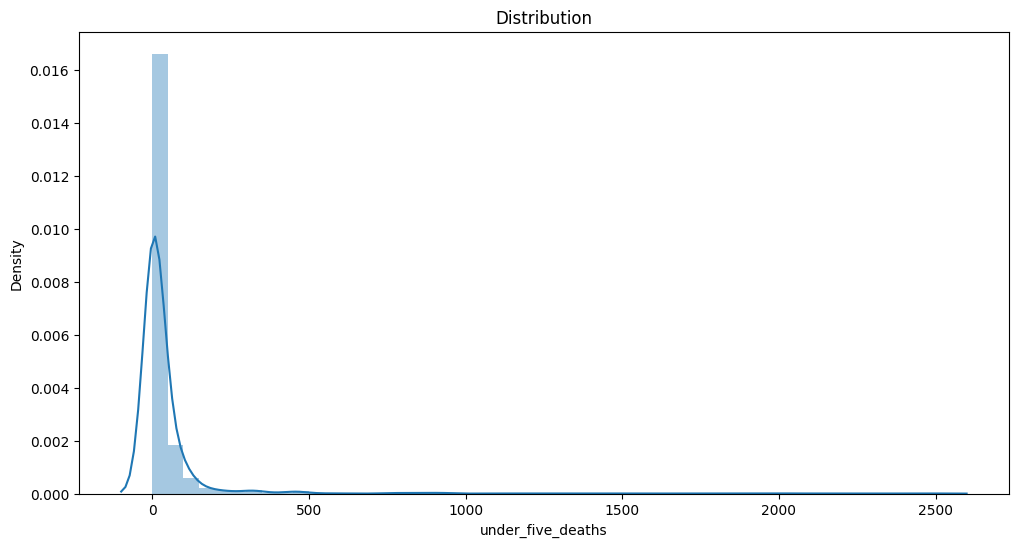

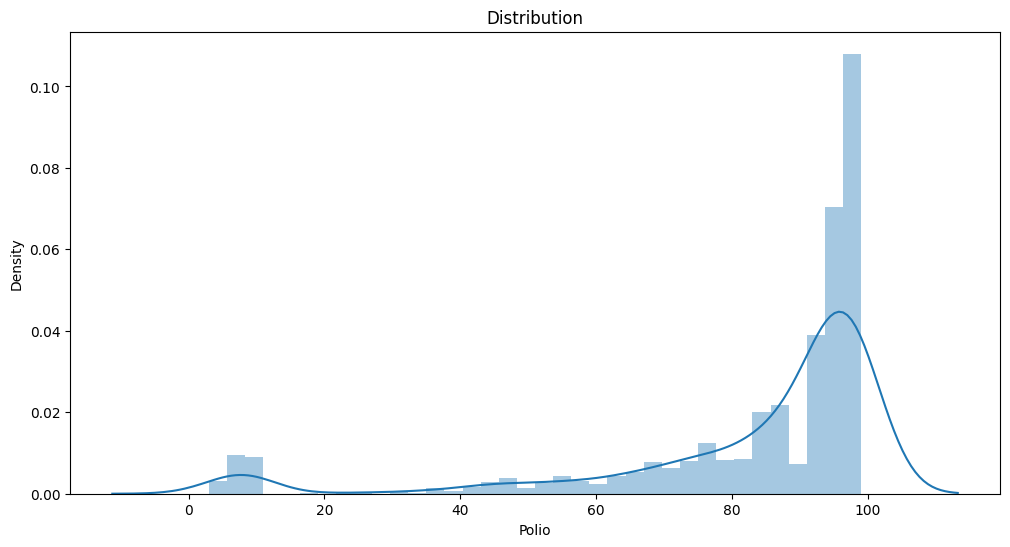

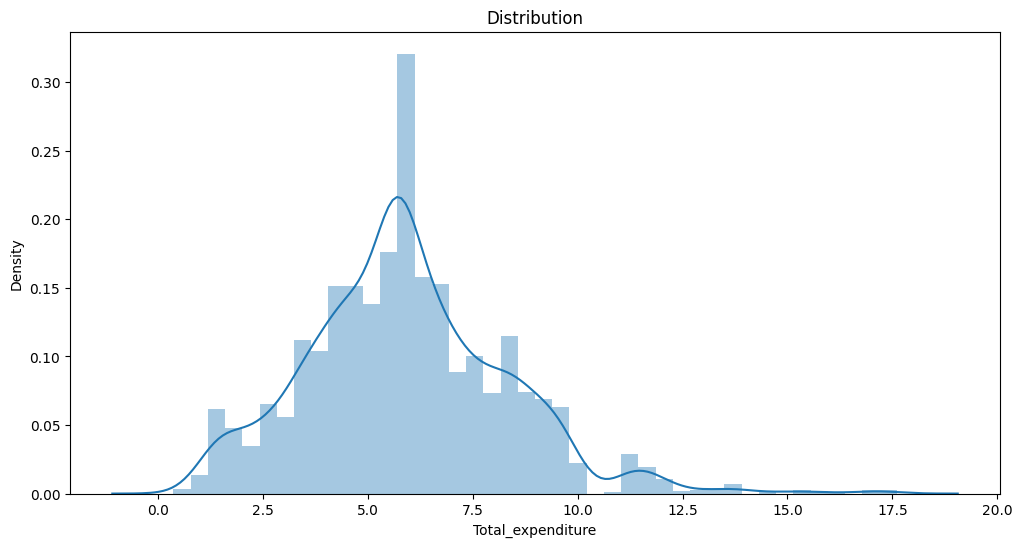

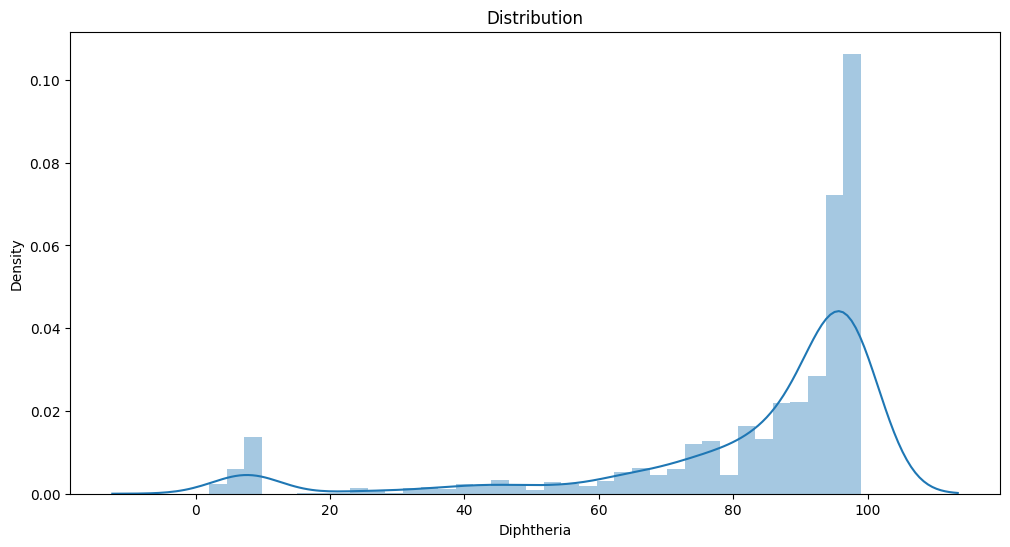

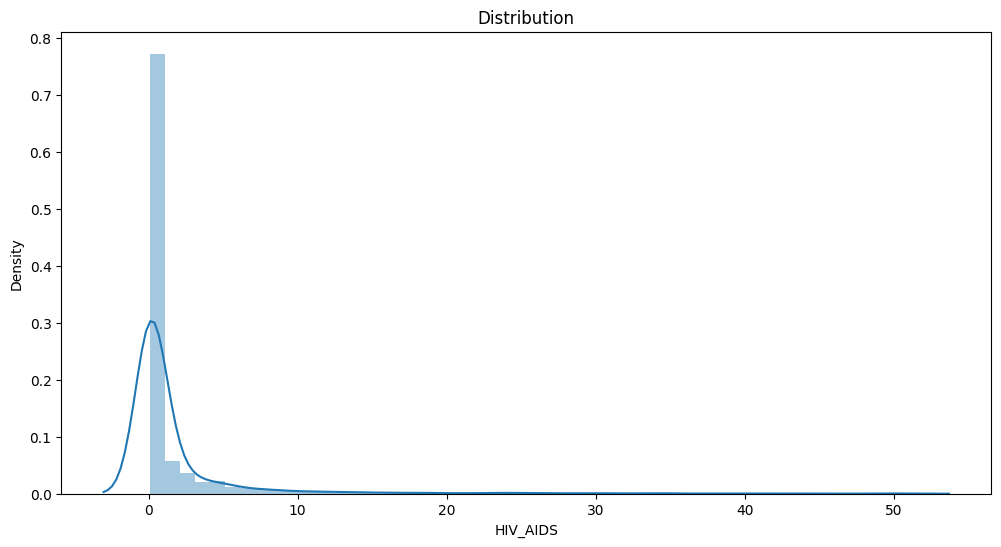

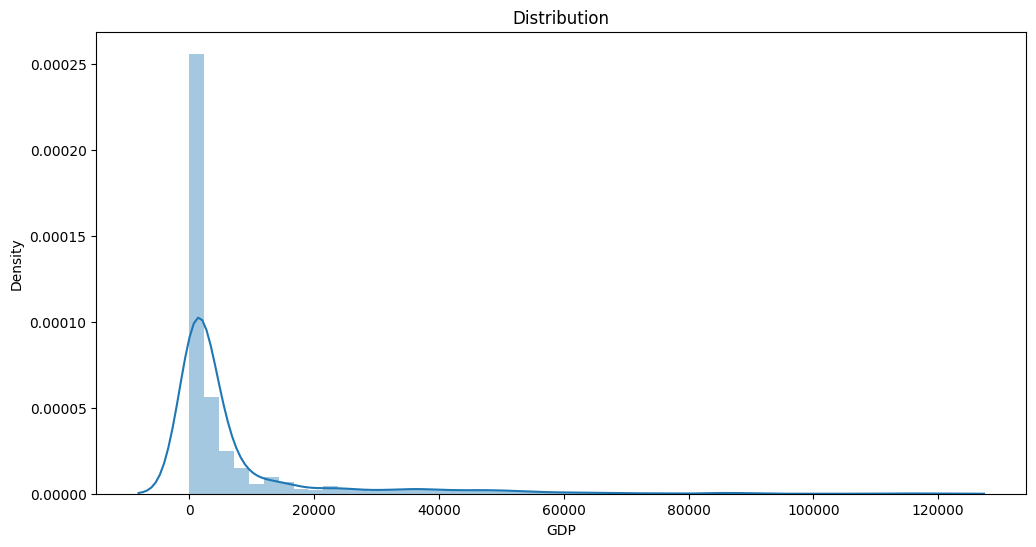

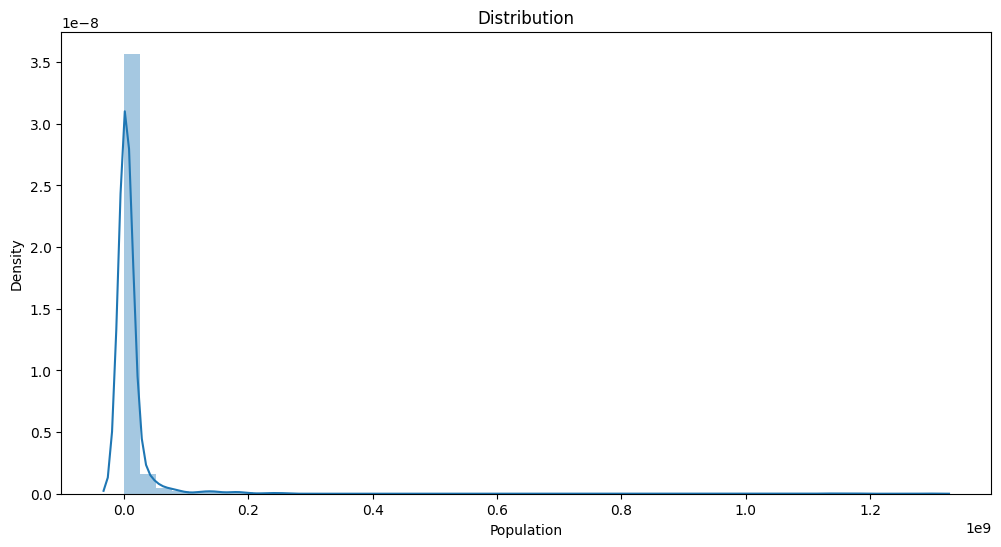

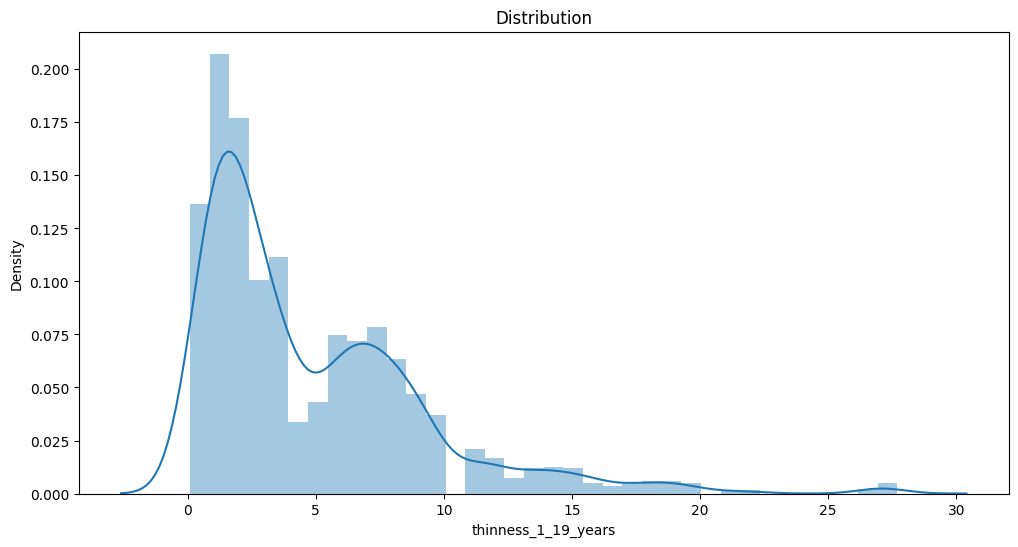

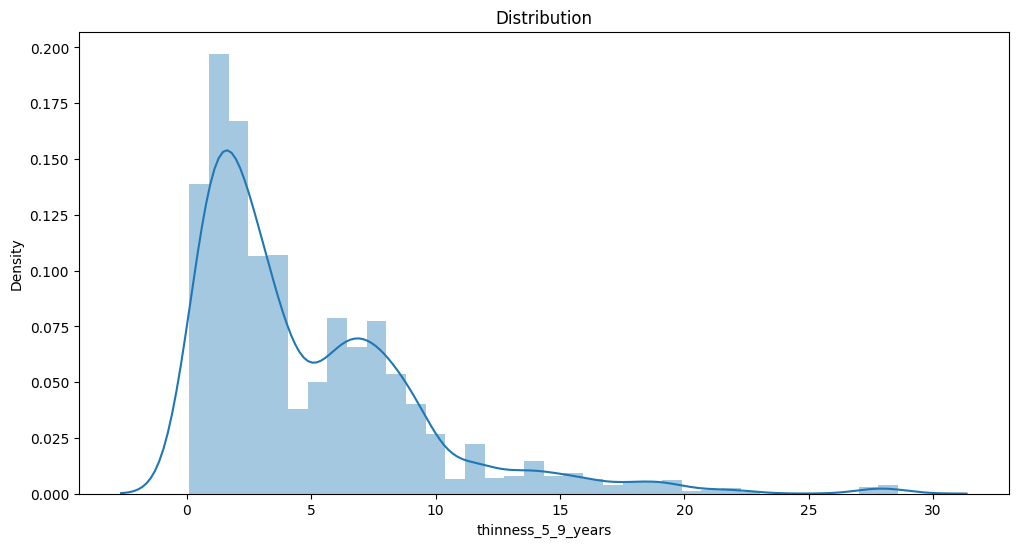

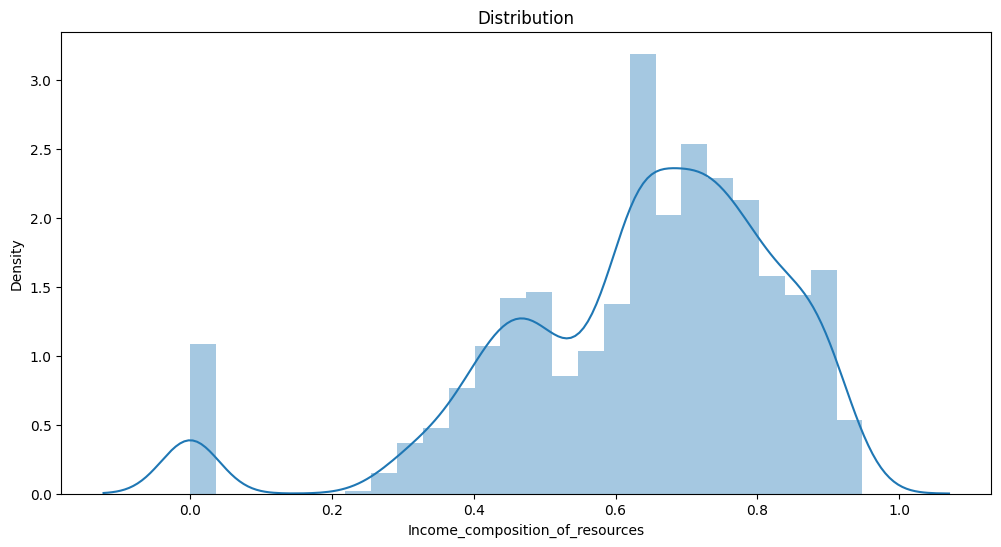

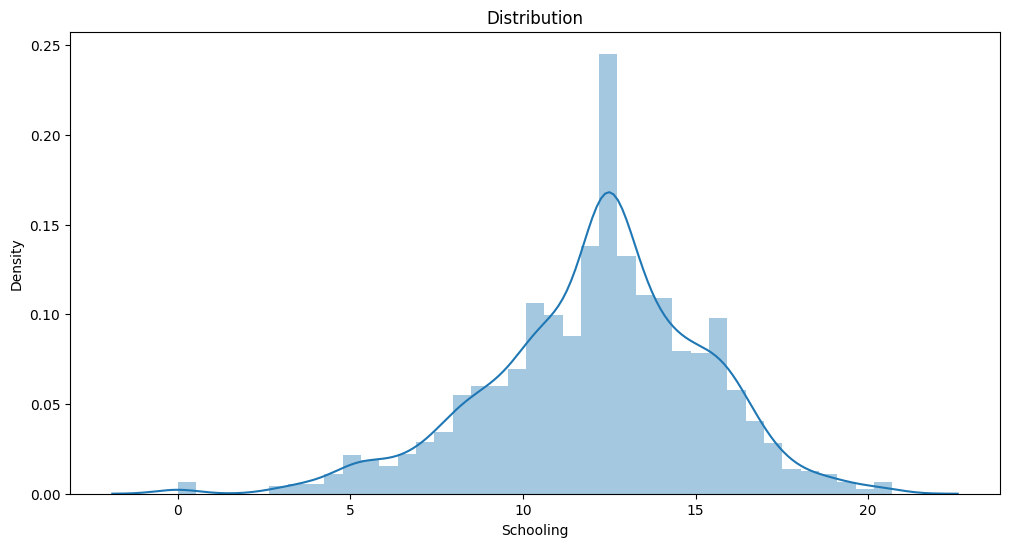

In [63]:
df_dist = df.drop('Country', axis = 1)
df_dist = df_dist.drop('Status', axis = 1)

for i in df_dist.columns:
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution')
    sns.distplot(df_dist[i])
    plt.show()

In [64]:
for i in df_dist.columns:
    print(df[i].skew())

-0.0038696998640079727
-0.10629096423567624
1.208532759658015
9.715748175525055
0.5942010093977034
4.609777736838798
-2.278273857211758
9.366467127134587
-0.2283977010333811
9.429771172718478
-2.1118635483375545
0.6227471556144699
-2.0879181267763047
5.361279515282561
3.5094803134111285
17.839421248490623
1.711946218502553
1.777975041735773
-1.176873139294154
-0.4523533690321944


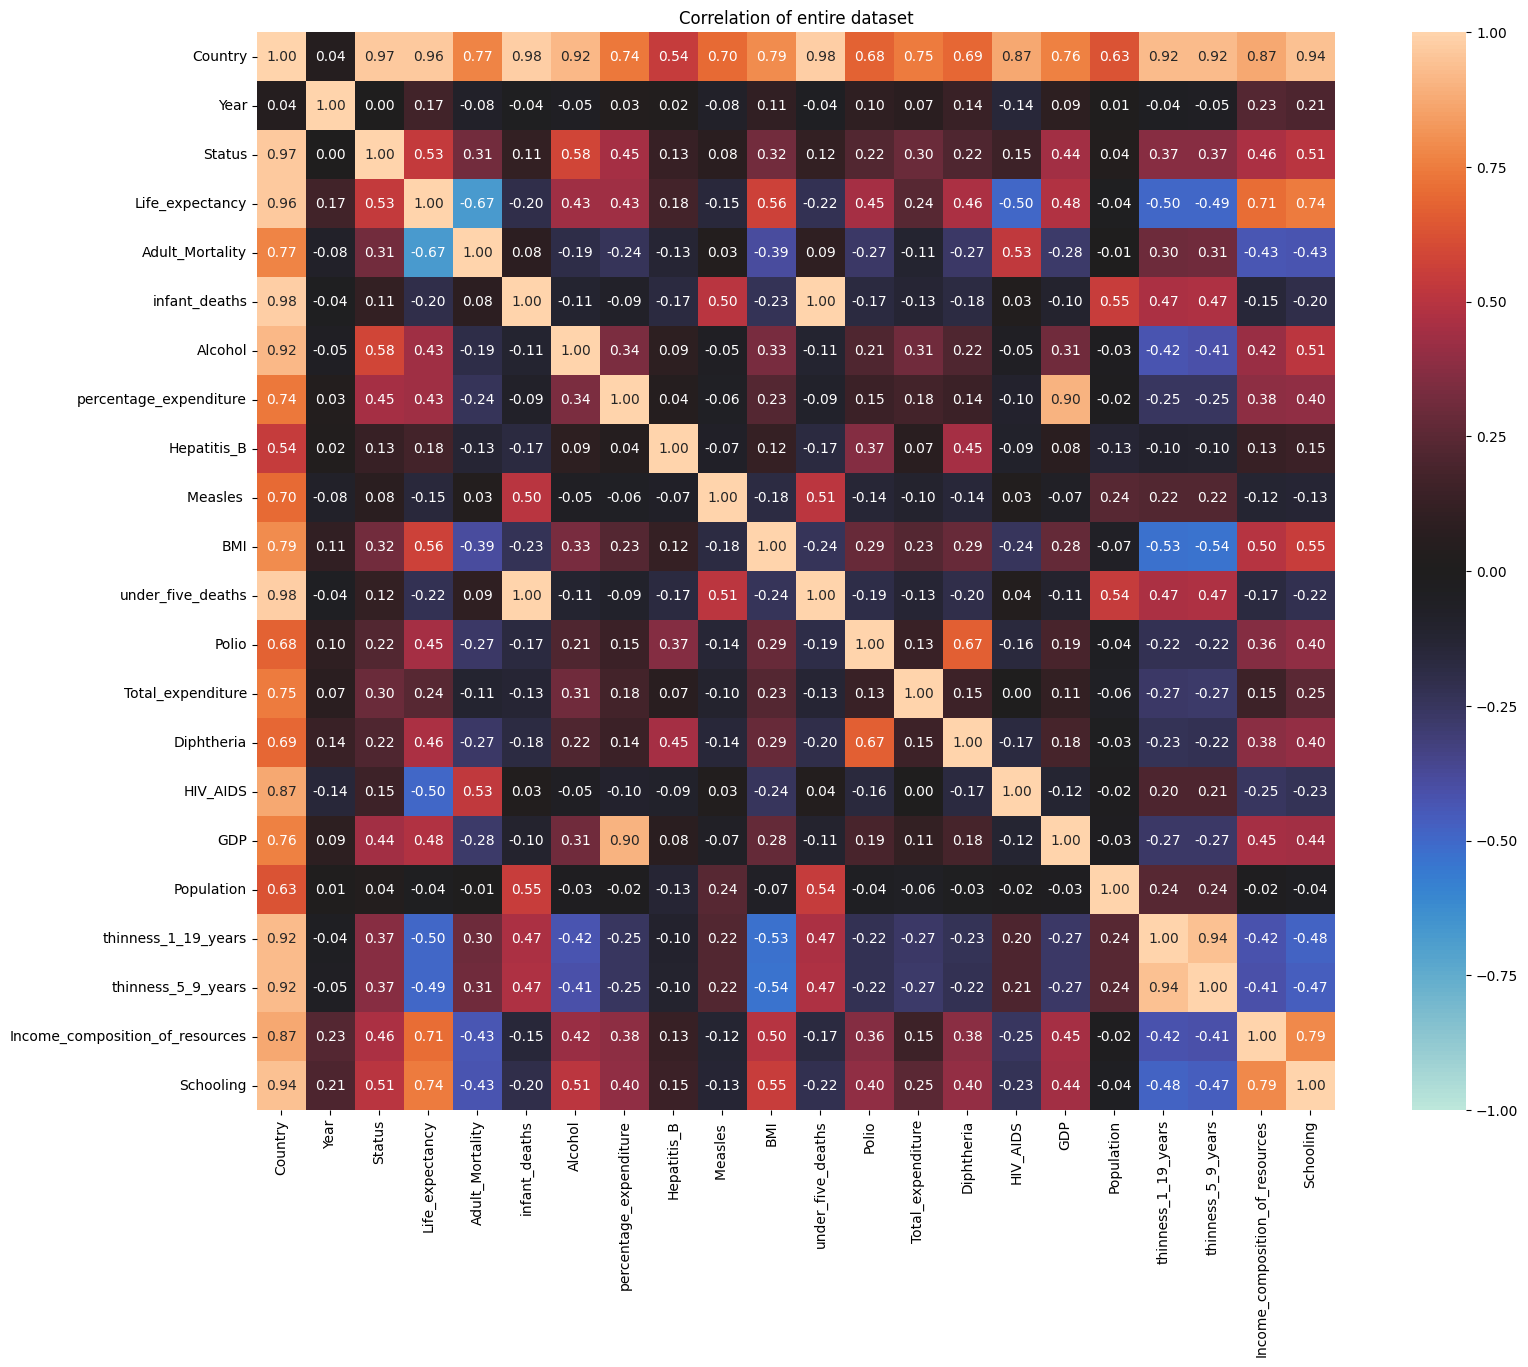

{'corr':                                   Country      Year    Status  \
 Country                          1.000000  0.041065  0.968492   
 Year                             0.041065  1.000000  0.001535   
 Status                           0.968492  0.001535  1.000000   
 Life_expectancy                  0.961896  0.166093  0.534390   
 Adult_Mortality                  0.770042 -0.080136  0.313241   
 infant_deaths                    0.979533 -0.037310  0.112548   
 Alcohol                          0.919185 -0.047906  0.579003   
 percentage_expenditure           0.741499  0.031834  0.452938   
 Hepatitis_B                      0.543413  0.024896  0.128494   
 Measles                          0.701754 -0.083198  0.078049   
 BMI                              0.794579  0.105360  0.315907   
 under_five_deaths                0.977110 -0.042781  0.115324   
 Polio                            0.676377  0.096300  0.220154   
 Total_expenditure                0.746251  0.070389  0.295829   
 D

In [65]:
associations(df, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', nom_num_assoc='correlation_ratio', ax=None, figsize=(20, 14), annot=True, fmt='.2f', cmap=None, cbar=True, vmax=1.0, vmin=None, plot=True, title='Correlation of entire dataset')

In [66]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV_AIDS                           float64
GDP                                float64
Population                         float64
thinness_1_19_years                float64
thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

# Baseline OLS Model

In [67]:
a, b = dmatrices('Life_expectancy ~ Schooling + Income_composition_of_resources + thinness_5_9_years + thinness_1_19_years + GDP + HIV_AIDS + Diphtheria + Polio + BMI + percentage_expenditure + Alcohol + Adult_Mortality', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['variable'] = b.columns
vif

VIF                         variable
0   48.428026                        Intercept
1    3.334079                        Schooling
2    2.848993  Income_composition_of_resources
3    8.623693               thinness_5_9_years
4    8.648711              thinness_1_19_years
5    5.810234                              GDP
6    1.405505                         HIV_AIDS
7    1.900071                       Diphtheria
8    1.887823                            Polio
9    1.744744                              BMI
10   5.551148           percentage_expenditure
11   1.510193                          Alcohol
12   1.695382                  Adult_Mortality

In [68]:
a, b = dmatrices('Life_expectancy ~ Schooling + Income_composition_of_resources + thinness_1_19_years + GDP + HIV_AIDS + Diphtheria + Polio + BMI + percentage_expenditure + Alcohol + Adult_Mortality', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['variable'] = b.columns
vif

VIF                         variable
0   48.247043                        Intercept
1    3.334052                        Schooling
2    2.847571  Income_composition_of_resources
3    1.591449              thinness_1_19_years
4    5.808383                              GDP
5    1.405274                         HIV_AIDS
6    1.899265                       Diphtheria
7    1.886987                            Polio
8    1.722120                              BMI
9    5.551133           percentage_expenditure
10   1.508975                          Alcohol
11   1.694119                  Adult_Mortality

In [69]:
model = sm.OLS(a, b)
fii = model.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     992.4
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:10:29   Log-Likelihood:                -31600.
No. Observations:                2888   AIC:                         6.322e+04
Df Residuals:                    2876   BIC:                         6.330e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.045e+04   1770.699     17.199      0.000     2.7e+04    3.39e+04
Schooling                        2518.9889    149.791     16.817      0.000    2225.279    2812.698
Income_composition_of_resources  2.141e+04   2146.806      9.974      0.000    1.72e+04    2.56e+04
thinness_1_19_years              -434.1556     72.748     -5.968      0.000    -576.799    -291.512
GDP                                 0.1539      0.046      3.354      0.001       0.064       0.244
HIV_AIDS                        -1088.1687     59.073    -18.421      0.000   -1203.998    -972.339
Diphtheria                        112.4756     14.858      7.570      0.000      83.342     141.609
Polio                              85.6312     15.010      5.705      0.000      56.199     115.063
BMI                               108.4721     16.761      6.472      0.000      75.607     141.337
percentage_expenditure              0.8182      0.300      2.728      0.006       0.230       1.406
Alcohol                           383.0966     79.721      4.805      0.000     226.781     539.412
Adult_Mortality                   -65.0654      2.676    -24.315      0.000     -70.312     -59.819
==============================================================================
Omnibus:                      140.708   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.567
Skew:                           0.366   Prob(JB):                     2.62e-57
Kurtosis:                       4.276   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
fii.resid.skew()

0.36664999361461476

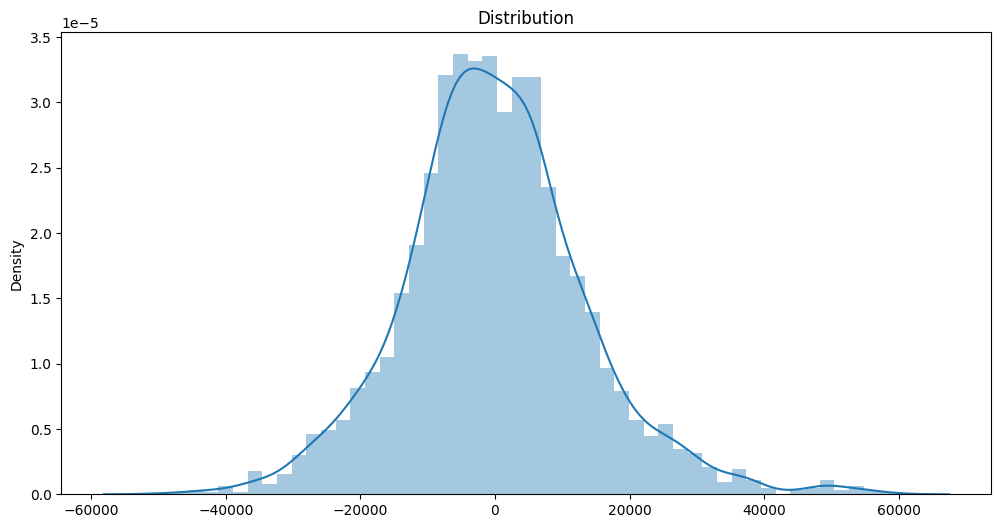

In [71]:
plt.subplots(figsize=(12, 6))
plt.title('Distribution')
sns.distplot(fii.resid)
plt.show()

In [72]:
df = pd.get_dummies(df, prefix=['Country', 'Status'], columns=['Country', 'Status'])

In [73]:
x = df.drop('Life_expectancy', axis = 1)

In [74]:
y = df['Life_expectancy']

In [75]:
etr_model = ExtraTreesRegressor()
etr_model.fit(x,y)
etr_model.feature_importances_

array([7.92339582e-03, 2.25004405e-01, 3.29751383e-03, 5.39550613e-03,
       4.38097447e-03, 2.06595492e-03, 1.67003878e-03, 6.29531720e-02,
       8.16488604e-03, 1.58301935e-02, 3.27569516e-03, 3.02860342e-02,
       7.03556401e-02, 7.31245740e-03, 1.91120274e-03, 1.36612463e-02,
       1.43714902e-02, 2.93797462e-01, 8.21610504e-02, 2.68190706e-04,
       1.07318378e-04, 2.61954134e-05, 7.47751935e-04, 8.39335697e-04,
       2.51276554e-04, 2.49067691e-05, 9.45979233e-05, 3.35744933e-04,
       5.62553756e-04, 8.50851619e-05, 2.13265270e-05, 3.48451459e-04,
       1.76575979e-05, 1.05570662e-04, 1.65425330e-04, 5.51362756e-04,
       1.90159614e-04, 2.83660098e-04, 4.34678682e-04, 5.91851753e-04,
       3.57219877e-04, 1.97712346e-05, 4.15678617e-05, 1.22597027e-04,
       1.87927279e-04, 1.24782390e-04, 5.56718954e-04, 9.86880141e-05,
       8.91739312e-05, 1.33977117e-04, 1.45006898e-04, 1.13309859e-04,
       5.54124850e-04, 5.34695190e-04, 1.67633933e-05, 1.51720935e-04,
      

<Axes: >

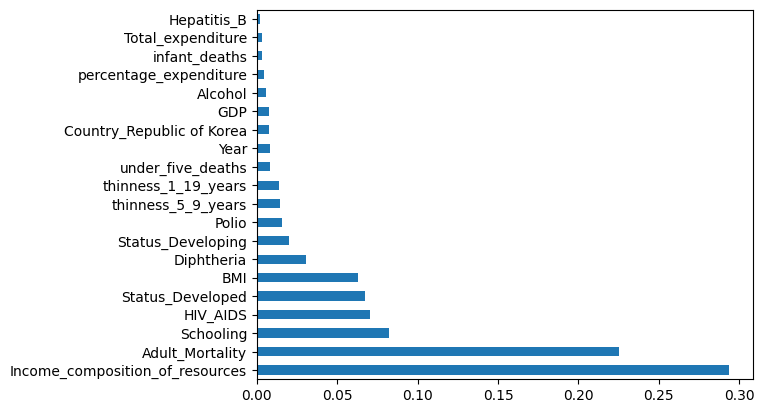

In [76]:
feature_imp = pd.Series(etr_model.feature_importances_,index=x.columns)
feature_imp.nlargest(20).plot(kind='barh')

In [77]:
x1 = df[['Income_composition_of_resources', 'Adult_Mortality', 'Schooling', 'HIV_AIDS', 'BMI', 'Status_Developed', 'Status_Developing', 'Diphtheria', 'Polio', 'thinness_5_9_years', 'thinness_1_19_years']]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.20, random_state = 42)

In [79]:
mms = MinMaxScaler()

In [80]:
X_train = pd.DataFrame(mms.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test),columns=X_test.columns)

# Linear Regression

In [81]:
LR = LinearRegression()

In [82]:
LR.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred_LR = LR.predict(X_test)

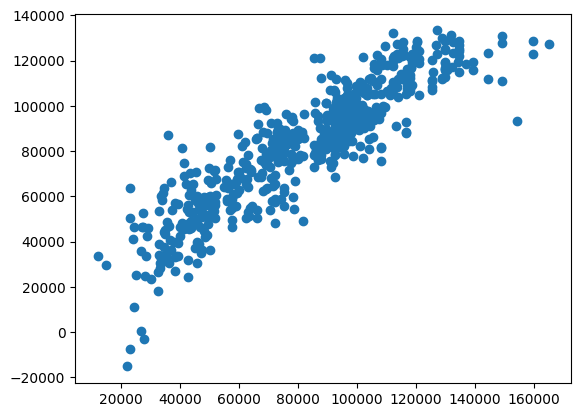

In [84]:
plt.scatter(y_test, y_pred_LR)

In [85]:
r2 = metrics.r2_score(y_test, y_pred_LR)
r2

0.8067042066710284

In [86]:
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))
rmse

13115.745381223933

In [88]:
score_LR = LR.score(X_train, y_train)
score_LR

0.7868811473643493

In [89]:
unexplained_percentage = rmse/ y_test.mean()
unexplained_percentage

0.159164568739891

# Decision Tree Regressor

In [90]:
DR = DecisionTreeRegressor()

In [91]:
DR.fit(X_train, y_train)

DecisionTreeRegressor()

In [92]:
y_pred_DR = DR.predict(X_test)

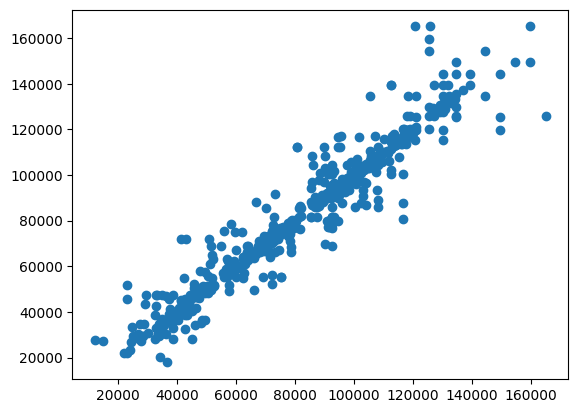

In [93]:
plt.scatter(y_test, y_pred_DR)

In [94]:
r2_DR = metrics.r2_score(y_test, y_pred_DR)
r2_DR

0.9160832294049256

In [95]:
rmse_DR = math.sqrt(metrics.mean_squared_error(y_test, y_pred_DR))
rmse_DR

8641.83871893915

In [96]:
score_DR = DR.score(X_train, y_train)
score_DR

1.0

In [97]:
unexplained_percentage_DT = rmse_DR/ y_test.mean()
unexplained_percentage_DT

0.10487200634351486

# Random Forest Regressor

In [98]:
RF = RandomForestRegressor()

In [99]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [100]:
y_pred_RF = RF.predict(X_test)

In [101]:
r2_RF = metrics.r2_score(y_test, y_pred_RF)
r2_RF

0.9539645564657218

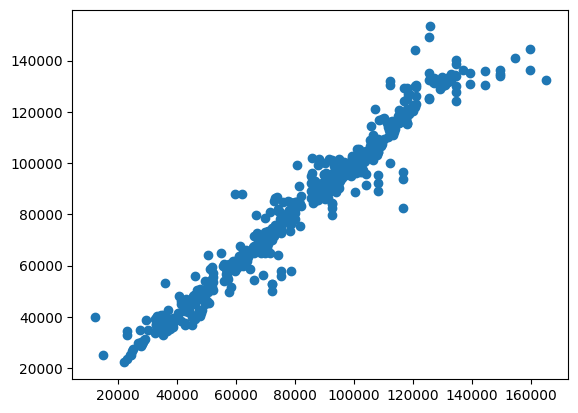

In [102]:
plt.scatter(y_test, y_pred_RF)

In [103]:
rmse_RF = math.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
rmse_RF

6400.706915876429

In [104]:
score_RF = RF.score(X_train, y_train)
score_RF

0.993424178496449

In [105]:
unexplained_percentage_RF = rmse_RF/ y_test.mean()
unexplained_percentage_RF

0.07767501779611709

# OLS after feature selection

In [102]:
c, d = dmatrices('Life_expectancy ~ Income_composition_of_resources + Adult_Mortality + Schooling + HIV_AIDS + BMI + Status_Developed + Status_Developing + Diphtheria + Polio + thinness_5_9_years + thinness_1_19_years', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
vif['variable'] = d.columns
vif

VIF                         variable
0   0.000000                        Intercept
1   2.793738  Income_composition_of_resources
2   1.696423                  Adult_Mortality
3   3.198569                        Schooling
4   1.394850                         HIV_AIDS
5   1.741738                              BMI
6        inf                 Status_Developed
7        inf                Status_Developing
8   1.898844                       Diphtheria
9   1.885381                            Polio
10  8.621920               thinness_5_9_years
11  8.605574              thinness_1_19_years

In [103]:
c, d = dmatrices('Life_expectancy ~ Income_composition_of_resources + Adult_Mortality + Schooling + HIV_AIDS + BMI + Status_Developed + Diphtheria + Polio + thinness_5_9_years + thinness_1_19_years', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
vif['variable'] = d.columns
vif

VIF                         variable
0   48.258501                        Intercept
1    2.793738  Income_composition_of_resources
2    1.696423                  Adult_Mortality
3    3.198569                        Schooling
4    1.394850                         HIV_AIDS
5    1.741738                              BMI
6    1.418818                 Status_Developed
7    1.898844                       Diphtheria
8    1.885381                            Polio
9    8.621920               thinness_5_9_years
10   8.605574              thinness_1_19_years

In [104]:
model1 = sm.OLS(c, d)
fii1 = model1.fit()
fii1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1089.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:47:14   Log-Likelihood:                -31603.
No. Observations:                2888   AIC:                         6.323e+04
Df Residuals:                    2877   BIC:                         6.329e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.056e+04   1772.252     17.242      0.000    2.71e+04     3.4e+04
Income_composition_of_resources  2.284e+04   2128.029     10.735      0.000    1.87e+04     2.7e+04
Adult_Mortality                   -63.9678      2.680    -23.871      0.000     -69.222     -58.713
Schooling                        2556.4714    146.828     17.411      0.000    2268.573    2844.370
HIV_AIDS                        -1057.6137     58.898    -17.957      0.000   -1173.100    -942.127
BMI                               109.7577     16.869      6.507      0.000      76.681     142.834
Status_Developed                 1.089e+04    795.684     13.687      0.000    9330.612    1.25e+04
Diphtheria                        110.7118     14.868      7.446      0.000      81.559     139.864
Polio                              84.3567     15.015      5.618      0.000      54.915     113.798
thinness_5_9_years               -200.8307    166.111     -1.209      0.227    -526.540     124.879
thinness_1_19_years              -232.2036    169.295     -1.372      0.170    -564.155      99.748
==============================================================================
Omnibus:                      145.499   Durbin-Watson:                   0.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.004
Skew:                           0.349   Prob(JB):                     8.72e-65
Kurtosis:                       4.401   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
e, f = dmatrices('Life_expectancy ~ Income_composition_of_resources + Adult_Mortality + Schooling + HIV_AIDS + BMI + Status_Developed + Diphtheria + Polio + thinness_1_19_years', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(f.values, i) for i in range(f.shape[1])]
vif['variable'] = f.columns
vif

VIF                         variable
0  48.075315                        Intercept
1   2.792577  Income_composition_of_resources
2   1.695342                  Adult_Mortality
3   3.198569                        Schooling
4   1.394697                         HIV_AIDS
5   1.718653                              BMI
6   1.415975                 Status_Developed
7   1.898026                       Diphtheria
8   1.884526                            Polio
9   1.540250              thinness_1_19_years

In [106]:
model2 = sm.OLS(e, f)
fii2 = model2.fit()
fii2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1210.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:47:14   Log-Likelihood:                -31604.
No. Observations:                2888   AIC:                         6.323e+04
Df Residuals:                    2878   BIC:                         6.329e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.042e+04   1769.027     17.198      0.000     2.7e+04    3.39e+04
Income_composition_of_resources  2.279e+04   2127.758     10.712      0.000    1.86e+04     2.7e+04
Adult_Mortality                   -64.0496      2.679    -23.907      0.000     -69.303     -58.796
Schooling                        2556.5169    146.839     17.410      0.000    2268.596    2844.438
HIV_AIDS                        -1058.3603     58.899    -17.969      0.000   -1173.850    -942.871
BMI                               112.1057     16.758      6.690      0.000      79.247     144.965
Status_Developed                 1.093e+04    794.951     13.754      0.000    9375.112    1.25e+04
Diphtheria                        110.3385     14.866      7.422      0.000      81.190     139.487
Polio                              84.7432     15.013      5.645      0.000      55.306     114.181
thinness_1_19_years              -417.6637     71.628     -5.831      0.000    -558.111    -277.216
==============================================================================
Omnibus:                      146.953   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.827
Skew:                           0.353   Prob(JB):                     2.13e-65
Kurtosis:                       4.406   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""